## Stock price prediction using Regression!

In [ ]:
# Install libraries
import pandas as pd
import numpy as np

import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_data = pd.read_csv('drive/MyDrive/TSLA.csv', index_col = "Date")

In [ ]:
df_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-31,67.538002,68.578003,67.031998,68.202003,68.202003,49817000
2017-06-01,68.800003,68.975998,67.458000,68.073997,68.073997,38040000
2017-06-02,67.954002,68.575996,67.185997,67.970001,67.970001,27951000
2017-06-05,67.699997,69.688004,66.842003,69.463997,69.463997,33922000
2017-06-06,68.940002,71.898003,67.994003,70.570000,70.570000,55434000


## EDA

In [ ]:
type(df_data)

pandas.core.frame.DataFrame

In [ ]:
df_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,655.020020,679.960022,638.059998,674.900024,674.900024,29634500
2022-05-24,653.530029,653.919983,620.570007,628.159973,628.159973,29697500
2022-05-25,623.849976,669.320007,623.010010,658.799988,658.799988,30713100
2022-05-26,661.419983,718.669983,653.659973,707.729980,707.729980,35334400
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29630300


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2017-05-31 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9+ KB


In [ ]:
df_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,320.215911,327.555639,312.127851,320.090076,320.090076,4.459376e+07
std,344.030872,351.979320,334.929492,343.577247,343.577247,3.010088e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,62.435001,63.382000,60.980000,62.299000,62.299000,2.526000e+07
50%,74.902000,75.650002,73.321999,75.019997,75.019997,3.477560e+07
75%,650.379975,662.279999,628.074982,649.869995,649.869995,5.203705e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
df_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

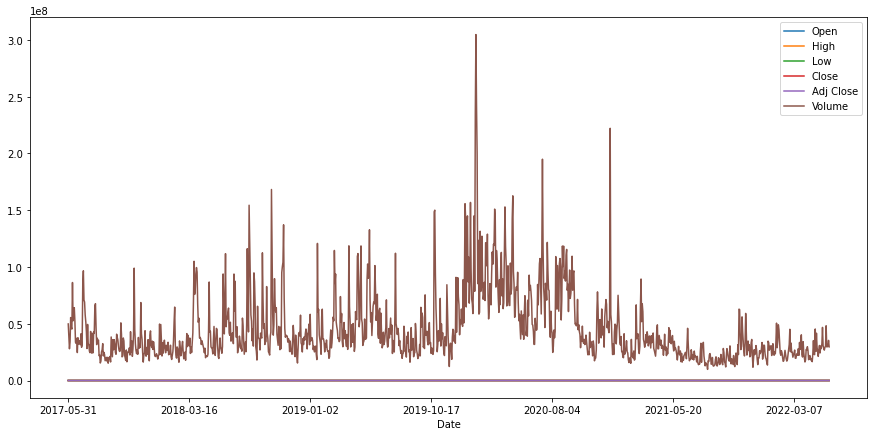

In [ ]:
df_data.plot(figsize = (15,7))

Text(0, 0.5, 'Price in USD')

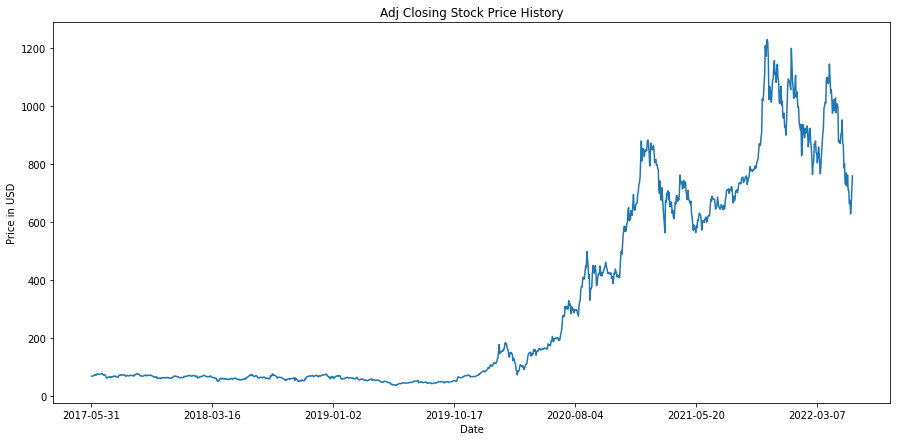

In [ ]:
df_data["Adj Close"].plot(figsize = (15,7))
plt.title("Adj Closing Stock Price History")
plt.ylabel("Price in USD")

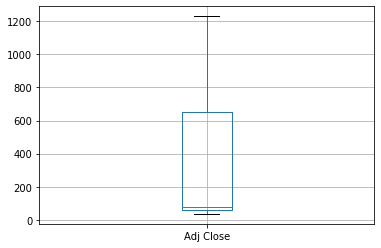

In [ ]:
df_data.boxplot(column = "Adj Close")

In [ ]:
def boxplot(column):
  plt.boxplot(column)

In [ ]:
columns = ["Open", "High", "Low", "Close", "Volume"]
columns

['Open', 'High', 'Low', 'Close', 'Volume']

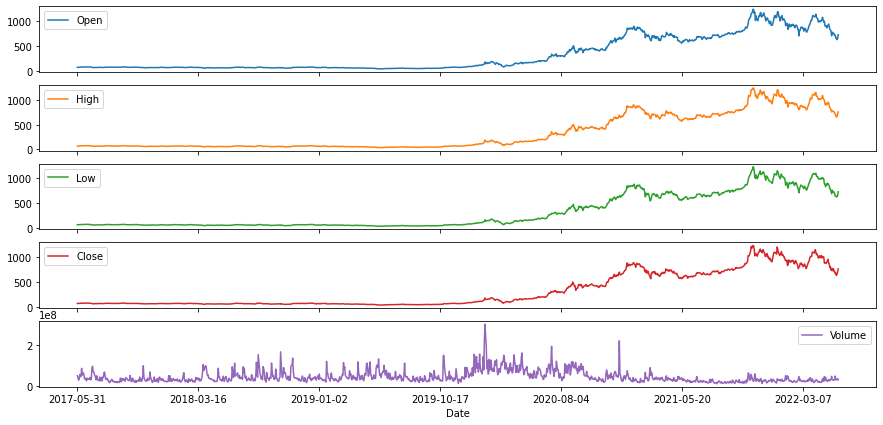

In [ ]:
graphs = df_data[columns].plot(figsize = (15,7), subplots = True)

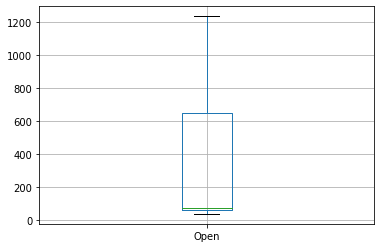

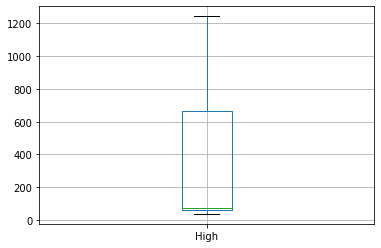

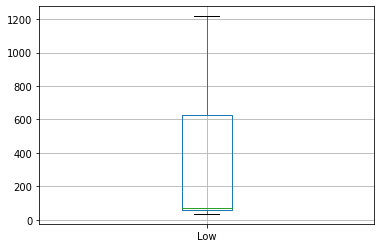

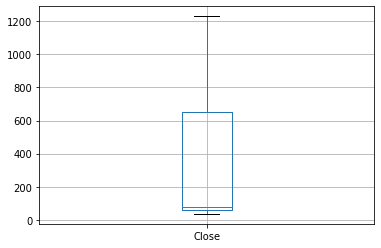

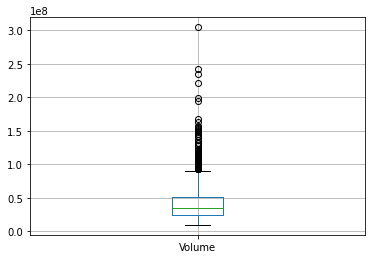

In [ ]:
for i in columns:
  plt.subplots()
  df_data.boxplot(column = [i])
  

In [ ]:
corr = df_data.corr()
corr.style.background_gradient(cmap = "coolwarm")

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999619,0.999408,0.998861,0.998861,-0.269297
High,0.999619,1.000000,0.999404,0.999474,0.999474,-0.263492
Low,0.999408,0.999404,1.000000,0.999530,0.999530,-0.275505
Close,0.998861,0.999474,0.999530,1.000000,1.000000,-0.268258
Adj Close,0.998861,0.999474,0.999530,1.000000,1.000000,-0.268258
Volume,-0.269297,-0.263492,-0.275505,-0.268258,-0.268258,1.000000


## Feature Engineering

In [ ]:
import math
forecast_out = int(math.ceil(0.05 * len(df_data))) # forcasting out 5% of the entire dataset
print(forecast_out)

df_data['label'] = df_data['Adj Close'].shift(-forecast_out)

63


In [ ]:
# Import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [ ]:
# Scale data
scaler = StandardScaler()
X = np.array(df_data.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [ ]:
df_data.dropna(inplace=True)
y = np.array(df_data['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Building

In [ ]:
## Linear Regression
lr  = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_confidence = lr.score(X_test, y_test)
lr_confidence

0.8442794872921633

In [ ]:
## Random Forest
Rf = RandomForestRegressor()
Rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
Rf_confidence = Rf.score(X_test, y_test)
Rf_confidence

0.9522126234372438

In [ ]:
last_date = df_data.index[-1] #getting the lastdate in the dataset
last_date

'2022-02-28'

In [ ]:
last_date = datetime.strptime(last_date, "%Y-%m-%d")

In [ ]:
type(last_date)

datetime.datetime

In [ ]:
from datetime import datetime

last_unix = datetime.timestamp(last_date) #converting it to time in seconds
one_day = 86400

next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = Rf.predict(X_Predictions) # predicting forecast data
df_data['Forecast'] = np.nan

for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df_data.loc[next_date] = [np.nan for _ in range(len(df_data.columns)-1)]+[i]

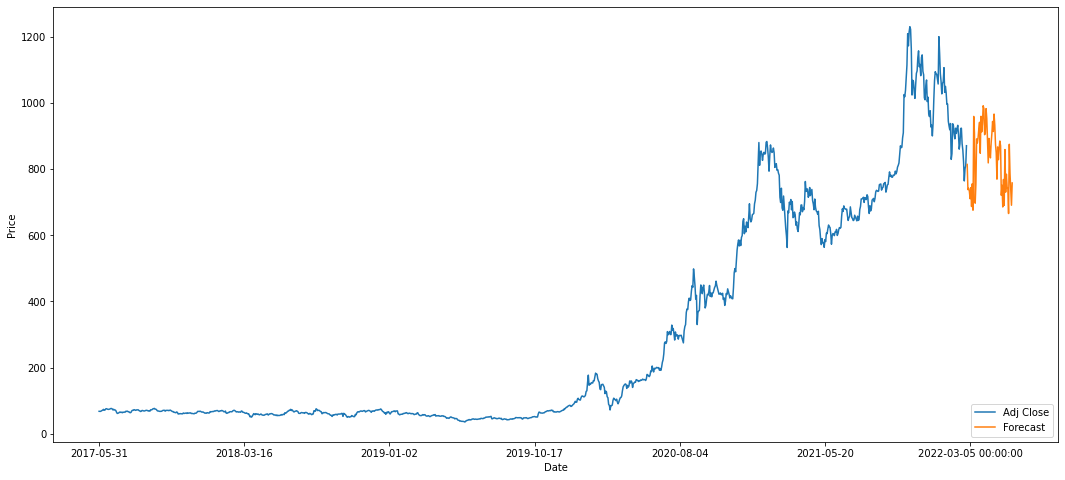

In [ ]:
plt.figure(figsize=(18, 8))
df_data['Adj Close'].plot()
df_data['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()